# Aula 01

## Indução e Regressão

Vamos começar importando algumas bibliotecas que serão usadas no Notebook.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## NumPy

O NumPy é uma biblioteca muito importante para desenvolvimento em Pythone porque ela permite tratar vetores como objetos matemáticos.

Vamos criar alguns vetores com cinco elementos e fazer algumas operações entre eles:

In [10]:
# Vetor de zeros
vetor_zeros = np.zeros(5)
print("Vetor de zeros:", vetor_zeros)

# Vetor de uns
vetor_uns = np.ones(5)
print("Vetor de uns:", vetor_uns)

# Vetor com valores aleatórios
vetor_aleatorio = np.random.rand(5)
print("Vetor aleatório:", vetor_aleatorio)

Vetor de zeros: [0. 0. 0. 0. 0.]
Vetor de uns: [1. 1. 1. 1. 1.]
Vetor aleatório: [0.30941844 0.161345   0.38095585 0.87738239 0.32773974]


Com o NumPy, operadores como `+` e `*` realmente promovem somas e multiplicações de vetores, não apenas concatenações de listas.

In [11]:
vetor_zeros + vetor_uns

array([1., 1., 1., 1., 1.])

In [12]:
vetor_aleatorio * 2

array([0.61883688, 0.32269   , 0.76191169, 1.75476477, 0.65547948])

### Uma função-conceito artificial

Vamos gerar uma pequena base fictícia para o seguinte problema:

- Seja $x$ a quantidade de horas que um aluno estudou por semana, qual será a nota $f(x)$ obtida na disciplina de IA?

Para isso, vamos propor uma função-conceito $f$ que produz uma curva não trivial.

In [13]:
f = lambda x: (np.sin(x+4.6) + np.sin(1.7*x + 4.8) + 3) * 2.3389

Vamos gerar um gráfico no intervalo $[0, 5]$ para vermos como essa função se comporta.

In [14]:
x100 = np.linspace(0, 5, 100) # Use np.linspace para gerar 100 pontos no intervalo [0, 5]
x100

array([0.        , 0.05050505, 0.1010101 , 0.15151515, 0.2020202 ,
       0.25252525, 0.3030303 , 0.35353535, 0.4040404 , 0.45454545,
       0.50505051, 0.55555556, 0.60606061, 0.65656566, 0.70707071,
       0.75757576, 0.80808081, 0.85858586, 0.90909091, 0.95959596,
       1.01010101, 1.06060606, 1.11111111, 1.16161616, 1.21212121,
       1.26262626, 1.31313131, 1.36363636, 1.41414141, 1.46464646,
       1.51515152, 1.56565657, 1.61616162, 1.66666667, 1.71717172,
       1.76767677, 1.81818182, 1.86868687, 1.91919192, 1.96969697,
       2.02020202, 2.07070707, 2.12121212, 2.17171717, 2.22222222,
       2.27272727, 2.32323232, 2.37373737, 2.42424242, 2.47474747,
       2.52525253, 2.57575758, 2.62626263, 2.67676768, 2.72727273,
       2.77777778, 2.82828283, 2.87878788, 2.92929293, 2.97979798,
       3.03030303, 3.08080808, 3.13131313, 3.18181818, 3.23232323,
       3.28282828, 3.33333333, 3.38383838, 3.43434343, 3.48484848,
       3.53535354, 3.58585859, 3.63636364, 3.68686869, 3.73737

In [15]:
y100 = f(x100)
y100

array([ 2.36262671,  2.37847971,  2.41725846,  2.47865644,  2.56222921,
        2.66739767,  2.79345226,  2.93955798,  3.10476032,  3.287992  ,
        3.4880804 ,  3.70375581,  3.93366022,  4.17635676,  4.4303396 ,
        4.69404437,  4.96585884,  5.24413403,  5.52719539,  5.81335421,
        6.10091906,  6.38820717,  6.67355571,  6.95533289,  7.2319488 ,
        7.50186588,  7.76360892,  8.0157747 ,  8.25704093,  8.48617465,
        8.7020399 ,  8.90360475,  9.08994736,  9.26026147,  9.41386078,
        9.55018263,  9.66879067,  9.76937661,  9.85176108,  9.91589349,
        9.96185102,  9.98983661, 10.0001761 ,  9.99331449,  9.96981129,
        9.93033516,  9.87565767,  9.8066464 ,  9.72425738,  9.6295269 ,
        9.52356275,  9.40753507,  9.28266669,  9.15022321,  9.01150275,
        8.86782564,  8.72052387,  8.57093058,  8.42036965,  8.27014536,
        8.12153224,  7.97576535,  7.83403071,  7.69745637,  7.56710382,
        7.44396008,  7.32893032,  7.22283123,  7.12638504,  7.04

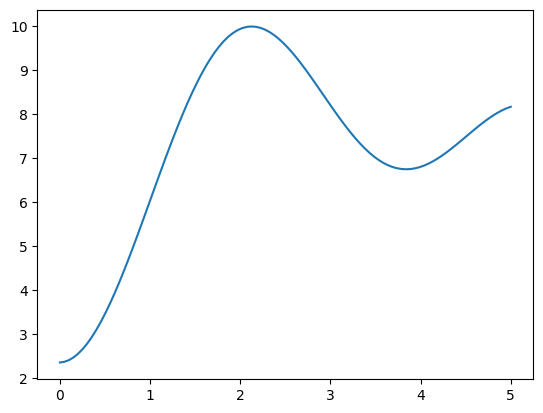

In [16]:
plt.plot(x100, y100) # Use plt.plot para plotar a curva

### Uma pequena base de treinamento

Agora vamos gerar uma base de treinamento. O ato de coletar dados é chamado **amostragem**, portanto essa base será a nossa **amostra**. Cada caso da amostra é chamado de **exemplo** ou **instância**.

Cada exemplo da nossa amostra será um par $(x_i, y_i)$. O valor $x_i$ é um **atributo de entrada** que **caracteriza** o exemplo. Normalmente usamos dados que possuem múltiplos atributos, mas para este exercício, teremos um único atributo de entrada. Já o valor $y_i$ é um **atributo-alvo** chamado **rótulo**. Em problemas de regressão o rótulo é um valor numérico e o objetivo do Aprendizado de Máquina é prever o rótulo correto $y_i$ (nota) para um valor de entrada $x_i$ (quantidade de horas estudadas).

Neste exercício os dados serão gerados artificialmente. Os valores $x_i$ serão tomados uniformemente entre 0 e 5. Os valores $y_i$ serão gerados com base na função $f$, acrescidos de um pequeno ruído aleatório.

Para gerar o ruído, usaremos o módulo `numpy.random`. Primeiro vamos criar um objeto da classe `RandomState`, especificando uma semente inicial. O motivo ficará claro em breve.

Para cada $x_i$, o valor de $y_i$ será calculado da seguinte forma:

$$y_i = f(x_i) + z_i$$

Sendo que $z_i$ é um valor aleatório escolhido de uma distribuição normal com média $0$ e desvio padrão $0{,}2$. Dessa forma o rótulo será um valor bem próximo, mas não idêntico ao produzido pela função-conceito. Normalmente é isso o que acontece no mundo real: os dados possuem uma parte regular e um ruído aleatório.

In [17]:
state = np.random.RandomState(42)
noise = state.normal(loc=0, scale=0.2, size=11)

In [18]:
x = np.linspace(0, 5, 11)
y = f(x) + noise #

Vamos observar esses dados, juntamente com a função-conceito?

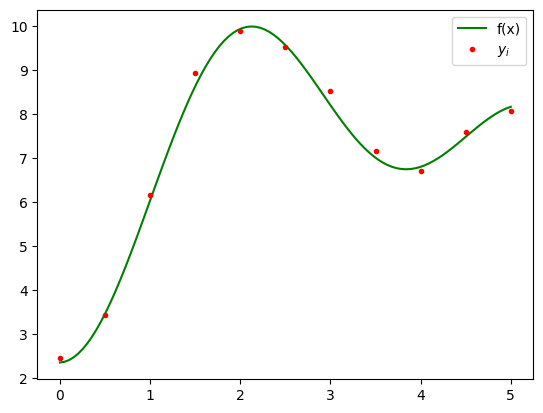

In [19]:
plt.plot(x100, f(x100), 'g', label='f(x)');
plt.plot(x, y, '.r', label='$y_i$');
plt.legend();

Pronto! Essa nossa pequena base será a **experiência E** que utilizaremos para treinar o modelo.

In [20]:
pd.DataFrame(np.array([x,y]).T, columns=["Estudo p/ dia", "Nota"])

,Estudo p/ dia,Nota
0,0.0,2.461970
1,0.5,3.439696
2,1.0,6.172912
3,1.5,8.943343
4,2.0,9.898808
5,2.5,9.531050
6,3.0,8.526279
7,3.5,7.169934
8,4.0,6.715973
9,4.5,7.599986


## Treinando um modelo de regressão com o scikit-learn

### Modelo de regressão

O nosso modelo $\hat{h}(x)$ será uma função de regressão linear. Ela terá a seguinte forma:

$$\hat{h}(x) = w_0 + w_1\cdot{}x$$

Lembrando um pouco de geometria analítica, podemos ver que $\hat{h}$ é a equação de uma reta. O nosso modelo vai tentar "encaixar" os pontos do conjunto de treinamento em uma reta.

Observe que o nosso modelo usa a variável de entrada $x$ e dois valores adicionais:

- $w_0$ é um **viés**
- $w_1$ é um **parâmetro** (que, no contexto de regressão, também é chamado **peso**)

O objetivo do treinamento é buscar (aprender) os melhores parâmetros para o conjunto de dados.

Vamos treinar o modelo utilizando a implementação do Python na biblioteca `scikit-learn`.

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
h = LinearRegression()

Um ponto importante do `scikit-learn` é que os dados de entrada dos modelos devem estar em matrizes.

No momento, nossos atributos de entrada estão guardados em um vetor:

In [23]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

Podemos converter esse vetor em uma matriz de 11 linhas e 1 coluna utilizando o método `reshape` dos vetores NumPy. Mas ao invés de especificar o número de linhas, podemos especificar `-1`, então o NumPy se encarregará de encontrar o máximo de linahs necessário.

In [24]:
X = x.reshape(-1, 1)
X

array([[0. ],
       [0.5],
       [1. ],
       [1.5],
       [2. ],
       [2.5],
       [3. ],
       [3.5],
       [4. ],
       [4.5],
       [5. ]])

Agora nós **ajustamos** o modelo aos dados. Isso é feito com o método `fit`. Ele deve receber como argumentos a matriz que contém os atributos de entrada e o vetor que contém os atributos de saída.

In [25]:
h.fit(X, y);

Após a execução do método `fit`, o modelo **aprendeu** o melhor conjunto de **parâmetros** para os dados de treinamento.

O atributo `intercept_` contém o valor do peso $w_0$. O atributo `coef_` é um vetor que guarda os valores dos demais pesos. Como nosso modelo tem a forma $y(x)~=~w_0~+~w_1x$, então esse vetor só tem um elemento:

In [26]:
h.coef_

array([0.75368817])

In [27]:
h.intercept_

np.float64(5.255987813581457)

Para fazer **inferências** com o modelo, usamos o método `predict`. Ele deve receber como entrada uma matriz de exemplos.

Vamos ver, por exemplo, quais notas seriam obtidas pelos alunos que estudarem, respectivamente, 2,75 horas por semana e 8 horas por semana.

In [28]:
h.predict([[2.75],
           [8]])

array([ 7.32863028, 11.28549316])

Agora, vamos verificar qual a saída do modelo para os próprios dados de treinamento:

In [29]:
ypred = h.predict(X)
ypred

array([5.25598781, 5.6328319 , 6.00967598, 6.38652007, 6.76336415,
       7.14020824, 7.51705232, 7.8938964 , 8.27074049, 8.64758457,
       9.02442866])

Podemos plotar isso em um gráfico:

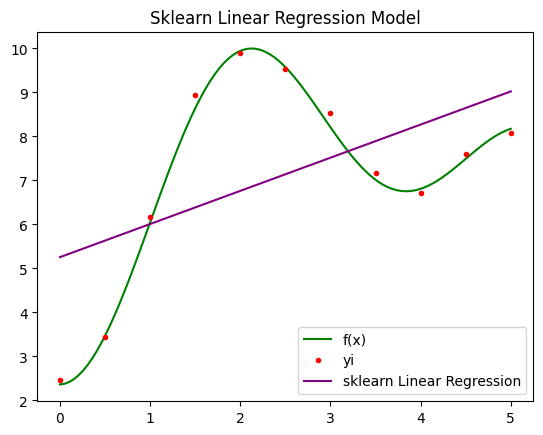

In [30]:
plt.figure()
plt.plot(x100, f(x100), 'g', label='f(x)');
plt.plot(x, y, '.r', label='yi');
plt.plot(x, ypred, 'purple', label='sklearn Linear Regression');
plt.legend();
plt.title('Sklearn Linear Regression Model')
plt.show()

### Mais atributos

O modelo encontrado anteriormente é muito simples. Possuindo apenas dois parâmetros, tudo o que o modelo pode fazer é ajustar o ângulo de interceptação e a altura em que a reta cruza o eixo das ordenadas.

Uma versão um pouco mais elaborada da regressão linear é a seguinte:

$$\begin{eqnarray}\hat{h}(x) & = & \displaystyle\sum_{i=0}^{M}w_ix^i\\ & = & w_0 + w_1x + w_2x^2 + w_3x^3 + \ldots + w_mx^m\end{eqnarray}$$

O conjunto de dados continua tendo apenas um atributo de entrada (a quantidade de horas que o estudante se dedicou), porém o modelo observa esse conjunto em um espaço de $M$ dimensões.

Isso aumenta a **capacidade** do modelo e ele pode fazer aproximações de conjuntos mais elaborados.

A primeira coisa a fazer é estender o conjunto de dados acrescentando colunas para $x^2$, $x^3$, $x^4$ etc.

Isso pode ser feito com a classe `PolynomialFeatures`. Ela é uma ferramenta de pré-processamento e pode ser instanciada assim:

In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3)

As classes de pré-processamento do `scikit-learn` têm duas funções importantes:

- A função `fit` serve para observar os dados e extrair estatísticas e aprender padrões deles. Funciona de maneira semelhante ao método `fit` dos modelos
- A função `transform` serve para aplicar a transformação nos dados

Podemos fazer um teste com uma pequena matriz de 3 linhas e uma coluna que possui apenas alguns valores de exemplo:

$$\begin{pmatrix}1\\2\\3\end{pmatrix}$$

Vamos aplicar um transformador polinomial nessa matriz, com grau 4, e observar o resultado.

In [32]:
teste = np.array([[1],
                  [2],
                  [3]])
teste

array([[1],
       [2],
       [3]])

In [33]:
poly_features.fit(teste);

In [34]:
poly_features.transform(teste)

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

Como podemos ver, o resultado foi uma matriz de cinco colunas. A primeira coluna contém apenas uns porque é o resultado de elevar os valores originais a zero ($x^0=1$). A segunda coluna contéms valores originais ($x^1$). A quarta coluna contém o quadrado dos valores originais, depois a quinta coluna contém os valores originais à terceira potência e a última contém os valores originais elevados à quarta potência.

Vamos agora fazer a mesma coisa com o conjunto de dados horas/nota, mas vamos omitir a primeira coluna ($x^0$) porque ela não é necessária para o modelo de regressão linear. Podemos fazer isso especificando o valor `False` para o parâmetro `include_bias` da classe `PolynomialFeatures`.

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [36]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

Agora a matriz `X_poly` contém os valores originais das horas estudadas por dia e o seu quadrado:

In [37]:
X_poly

array([[ 0.  ,  0.  ],
       [ 0.5 ,  0.25],
       [ 1.  ,  1.  ],
       [ 1.5 ,  2.25],
       [ 2.  ,  4.  ],
       [ 2.5 ,  6.25],
       [ 3.  ,  9.  ],
       [ 3.5 , 12.25],
       [ 4.  , 16.  ],
       [ 4.5 , 20.25],
       [ 5.  , 25.  ]])

Vamos treinar o modelo, que agora terá a seguinte forma e será uma parábola:

$$h(x) = w_0 + w_1x + w_2x^2$$

In [38]:
h = LinearRegression()
h.fit(X_poly, y);

Quais foram os pesos aprendidos? `h.intercept_` contém o valor de $w_0$:

In [39]:
h.intercept_

np.float64(2.698258853009664)

E `h.coef_` é um vetor que contém os valores dos outros pesos (isto é, $w_1$ e $w_2$).

In [40]:
h.coef_

array([ 4.16399345, -0.68206106])

Vamos aplicar o modelo nos dados de treinamento e depois plotar a curva do modelo?

In [41]:
ypred = h.predict(X_poly)

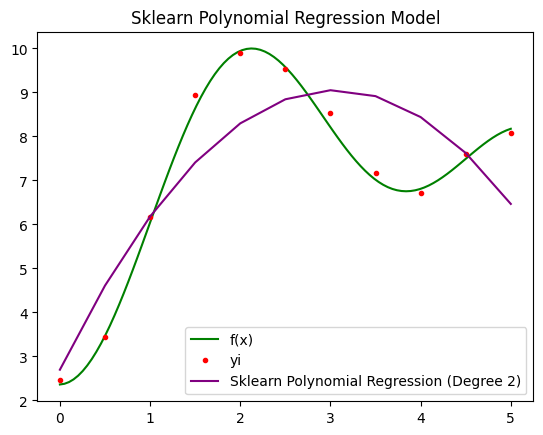

In [42]:
plt.figure()
plt.plot(x100, f(x100), 'g', label='f(x)');
plt.plot(x, y, '.r', label='yi');
plt.plot(x, ypred, 'purple', label='Sklearn Polynomial Regression (Degree 2)');
plt.legend();
plt.title('Sklearn Polynomial Regression Model')
plt.show()

## Ainda mais atributos

Vamos repetir os mesmos passos, mas agora para um modelo de grau 4

$$h(x) = w_0 + w_1x + w_2x^2 + w_3x^3 + w_4x^4$$

Primeiro, os atributos polinomiais:

In [43]:
poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features.fit_transform(X)

Agora, o treinamento do modelo:

In [44]:
h = LinearRegression()

h.fit(X_poly, y)
ypred = h.predict(X_poly)

Quais são os pesos?

In [45]:
h.intercept_

np.float64(2.080759800002646)

In [46]:
h.coef_

array([ 3.40258644,  2.10514213, -1.3089807 ,  0.16068919])

Vamos plotar os dados. Mas, para que a curva do modelo fique mais suave, vams gerar uma sequência com 100 pontos entre 0 e 5 ao invés de testarmos o modelo apenas nos 11 exemplos do conjunto de treinamento.

In [47]:
X_teste = x100.reshape(-1, 1)
X_teste_poly = poly_features.fit_transform(X_teste)
y_teste = h.predict(X_teste_poly)

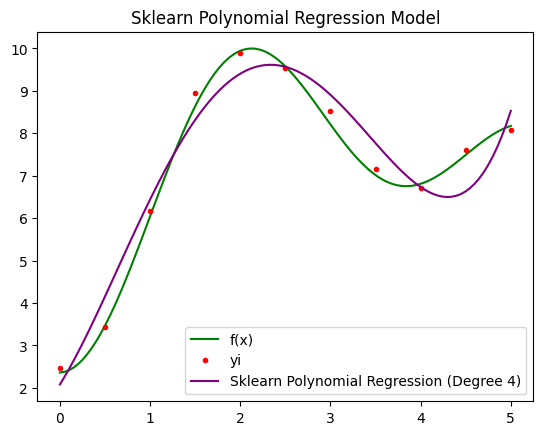

In [48]:
plt.figure()
plt.plot(x100, f(x100), 'g', label='f(x)');
plt.plot(x, y, '.r', label='yi');
plt.plot(x100, y_teste, 'purple', label='Sklearn Polynomial Regression (Degree 4)');
plt.legend();
plt.title('Sklearn Polynomial Regression Model')
plt.show()